In [1]:
!pip install -q -U autogluon.tabular

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aiobotocore 2.12.3 requires botocore<1.34.70,>=1.34.41, but you have botocore 1.29.165 which is incompatible.
spopt 0.6.0 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.


In [2]:
from autogluon.tabular import TabularPredictor,TabularDataset
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import shutil

warnings.filterwarnings('ignore')
seed = 27

# Loading the Dataset

In [3]:
train = pd.read_csv('/kaggle/input/flood-prediction-precomputed-stat-features/train.csv', index_col='id')

In [4]:
feats_to_drop = [
    '_sort_6', '_cnt17', 'Deforestation', 'Watersheds', '_std', '_cnt1', '_cnt12', 
    '_cnt16', '_cnt8', '_sort_9', 'RiverManagement', 'Encroachments', '_30th', '_10th', 
    '_min', 'DrainageSystems', '_sort_7', '_40th', '_sort_5', 'PoliticalFactors', 
    'ClimateChange', '_mode', 'Landslides', 'TopographyDrainage', 'PopulationScore'
]
train = train.drop(columns=feats_to_drop)

In [5]:
_train, _val = train_test_split(
    train, 
    test_size=0.1, 
    random_state=seed
)

del train

In [6]:
_train = TabularDataset(_train)
_val = TabularDataset(_val)

# Training

In [7]:
predictor = TabularPredictor(
    label='FloodProbability',
    eval_metric='r2',
    problem_type="regression",
    verbosity=2
).fit(
    train_data=_train,
    time_limit=3600 * 10,
    presets="good_quality",
    excluded_model_types = ["NN_TORCH", "FASTAI", "NN"],
    keep_only_best=True,
    hyperparameter_tune_kwargs={  
        'num_trials': 50,
        'scheduler' : 'local',
        'searcher'  : 'auto'
    },
)

No path specified. Models will be saved in: "AutogluonModels/ag-20240521_060712"
Presets specified: ['good_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Note: `save_bag_folds=False`! This will greatly reduce peak disk usage during fit (by ~8x), but runs the risk of an out-of-memory error during model refit if memory is small relative to the data size.
	You can avoid this risk by setting `save_bag_folds=True`.
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked

  0%|          | 0/50 [00:00<?, ?it/s]

Will use sequential fold fitting strategy because import of ray failed. Reason: ray==2.9.0 detected. 2.10.0 <= ray < 2.11.0 is required. You can use pip to install certain version of ray `pip install ray==2.10.0` 
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 324. Best iteration is:
	[270]	valid_set's l2: 0.000348267	valid_set's r2: -80.6524
	Ran out of time, early stopping on iteration 342. Best iteration is:
	[283]	valid_set's l2: 0.000346838	valid_set's r2: -81.0535
	Ran out of time, early stopping on iteration 350. Best iteration is:
	[330]	valid_set's l2: 0.000347527	valid_set's r2: -80.7849
	Ran out of time, early stopping on iteration 430. Best iteration is:
	[421]	valid_set's l2: 0.000345681	valid_set's r2: -81.1817
	Stopping HPO to satisfy time limit...
Fitted model: LightGBMXT_BAG_L1/T1 ...
	0.866	 = Validation score   (r2)
	649.09s	 = Training   runtime
	0.01s	 = Validation runtime
Hyperp

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 58. Best iteration is:
	[51]	valid_set's l2: 0.00155608	valid_set's r2: -80.9172
	Ran out of time, early stopping on iteration 58. Best iteration is:
	[54]	valid_set's l2: 0.00149775	valid_set's r2: -81.8302
	Ran out of time, early stopping on iteration 60. Best iteration is:
	[50]	valid_set's l2: 0.00156387	valid_set's r2: -81.3105
	Ran out of time, early stopping on iteration 62. Best iteration is:
	[48]	valid_set's l2: 0.00159898	valid_set's r2: -81.0256
	Ran out of time, early stopping on iteration 67. Best iteration is:
	[50]	valid_set's l2: 0.00156088	valid_set's r2: -81.5141
	Ran out of t

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 284.
	Ran out of time, early stopping on iteration 300.
	Ran out of time, early stopping on iteration 306.
	Ran out of time, early stopping on iteration 324.
	Ran out of time, early stopping on iteration 338.
	Ran out of time, early stopping on iteration 362.
	Ran out of time, early stopping on iteration 398.
	Ran out of time, early stopping on iteration 488.
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L1/T1 ...
	0.8683	 = Validation score   (r2)
	734.05s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L1 ... Tuning model for up to 770.61s of the 6192.6s of remaining time.
	No hyperparameter search space specified for ExtraTreesMSE_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
Fitted model: ExtraTreesMSE_BAG_L1 ...
	0.8692	 = Validation score   (r2)

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: XGBoost_BAG_L1/T1 ...
	0.869	 = Validation score   (r2)
	737.07s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: LightGBMLarge_BAG_L1 ... Training model for up to 770.61s of the 4657.58s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	0.6195	 = Validation score   (r2)
	209.11s	 = Training   runtime
	1.82s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 599.36s of the 4444.84s of remaining time.
	Ensemble Weights: {'ExtraTreesMSE_BAG_L1': 0.55, 'XGBoost_BAG_L1/T1': 0.4, 'RandomForestMSE_BAG_L1': 0.05}
	0.8693	 = Validation score   (r2)
	4.28s	 = Training   runtime
	0.02s	 = Validation runtime
Excluded models: ['NN_TORCH', 'FASTAI'] (Specified by `excluded_model_types`)
Fitting 7 L2 models ...
Hyperparameter tuning model: LightGBMXT_BA

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: LightGBMXT_BAG_L2/T1 ...
	0.8277	 = Validation score   (r2)
	222.73s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBMXT_BAG_L2/T2 ...
	0.8595	 = Validation score   (r2)
	239.32s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: LightGBM_BAG_L2 ... Tuning model for up to 570.91s of the 3973.17s of remaining time.


  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L2/T1 ...
	0.605	 = Validation score   (r2)
	173.39s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T2 ...
	0.6494	 = Validation score   (r2)
	168.36s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T3 ...
	0.6331	 = Validation score   (r2)
	186.19s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: RandomForestMSE_BAG_L2 ... Tuning model for up to 570.91s of the 3440.25s of remaining time.
	No hyperparameter search space specified for RandomForestMSE_BAG_L2. Skipping HPO. Will train one model based on the provided hyperparameters.
Fitted model: RandomForestMSE_BAG_L2 .

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 183.
	Ran out of time, early stopping on iteration 189.
	Ran out of time, early stopping on iteration 197.
	Ran out of time, early stopping on iteration 206.
	Ran out of time, early stopping on iteration 215.
	Ran out of time, early stopping on iteration 230.
	Ran out of time, early stopping on iteration 260.
	Ran out of time, early stopping on iteration 309.
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L2/T1 ...
	0.869	 = Validation score   (r2)
	539.97s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L2 ... Tuning model for up to 570.91s of the 2298.44s of remaining time.
	No hyperparameter search space specified for ExtraTreesMSE_BAG_L2. Skipping HPO. Will train one model based on the provided hyperparameters.
Fitted model: ExtraTreesMSE_BAG_L2 ...
	0.8693	 = Validation score   (r2)

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: XGBoost_BAG_L2/T1 ...
	0.8693	 = Validation score   (r2)
	542.83s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: LightGBMLarge_BAG_L2 ... Training model for up to 570.91s of the 1178.02s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	0.6467	 = Validation score   (r2)
	236.58s	 = Training   runtime
	2.2s	 = Validation runtime
Fitting model: WeightedEnsemble_L3 ... Training model for up to 444.04s of the 936.08s of remaining time.
	Ensemble Weights: {'ExtraTreesMSE_BAG_L2': 0.312, 'ExtraTreesMSE_BAG_L1': 0.188, 'XGBoost_BAG_L1/T1': 0.188, 'XGBoost_BAG_L2/T1': 0.188, 'RandomForestMSE_BAG_L2': 0.125}
	0.8694	 = Validation score   (r2)
	5.06s	 = Training   runtime
	0.02s	 = Validation runtime
AutoGluon training complete, total runtime = 8069.98s ... Best model: "WeightedEnse

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 368. Best iteration is:
	[331]	valid_set's l2: 0.000344809	valid_set's r2: -81.274
	Ran out of time, early stopping on iteration 374. Best iteration is:
	[277]	valid_set's l2: 0.000347766	valid_set's r2: -81.0185
	Stopping HPO to satisfy time limit...
Fitted model: LightGBMXT_BAG_L1/T1 ...
	0.8656	 = Validation score   (r2)
	712.03s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: LightGBMXT_BAG_L1/T2 ...
	0.8661	 = Validation score   (r2)
	674.07s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: LightGBMXT_BAG_L1/T3 ...
	0.8661	 = Validation score   (r2)
	766.26s	 = Training   runtime
	0.01s	 = Validation runtime
Hyperparameter tuning model: LightGB

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L1/T1 ...
	0.5859	 = Validation score   (r2)
	156.24s	

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 819.
	Ran out of time, early stopping on iteration 839.
	Ran out of time, early stopping on iteration 873.
	Ran out of time, early stopping on iteration 900.
	Ran out of time, early stopping on iteration 954.
	Ran out of time, early stopping on iteration 1001.
	Ran out of time, early stopping on iteration 1082.
	Ran out of time, early stopping on iteration 1322.
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L1/T1 ...
	0.869	 = Validation score   (r2)
	2248.08s	 = Training   runtime
	0.01s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L1 ... Tuning model for up to 2349.5s of the 18526.81s of remaining time.
	No hyperparameter search space specified for ExtraTreesMSE_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
Fitted model: ExtraTreesMSE_BAG_L1 ...
	0.8692	 = Validation score 

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: XGBoost_BAG_L1/T1 ...
	0.8691	 = Validation score   (r2)
	1862.97s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: LightGBMLarge_BAG_L1 ... Training model for up to 2349.5s of the 15290.73s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	0.6157	 = Validation score   (r2)
	224.11s	 = Training   runtime
	1.91s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 1827.39s of the 15061.93s of remaining time.
	Ensemble Weights: {'ExtraTreesMSE_BAG_L1': 0.5, 'XGBoost_BAG_L1/T1': 0.25, 'CatBoost_BAG_L1/T1': 0.188, 'RandomForestMSE_BAG_L1': 0.062}
	0.8694	 = Validation score   (r2)
	4.74s	 = Training   runtime
	0.03s	 = Validation runtime
Excluded models: ['NN_TORCH', 'FASTAI'] (Specified by `excluded_model_types`)
Fitting 7 L2 models ...
Hyperpa

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: LightGBMXT_BAG_L2/T1 ...
	0.8106	 = Validation score   (r2)
	261.21s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBMXT_BAG_L2/T2 ...
	0.842	 = Validation score   (r2)
	249.57s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBMXT_BAG_L2/T3 ...
	0.8394	 = Validation score   (r2)
	278.38s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: LightGBMXT_BAG_L2/T4 ...
	0.796	 = Validation score   (r2)
	899.48s	 = Training   runtime
	0.01s	 = Validation runtime
Hyperparameter tuning model: LightGBM_BAG_L2 ... Tuning model for up to 1935.

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 37. Best iteration is:
	[36]	valid_set's l2: 0.000984234	valid_set's r2: -81.0844
	Ran out of time, early stopping on iteration 38. Best iteration is:
	[38]	valid_set's l2: 0.000937687	valid_set's r2: -81.4646
	Ran out of time, early stopping on iteration 40. Best iteration is:
	[39]	valid_set's l2: 0.000918428	valid_set's r2: -81.112
	Ran out of time, early stopping on iteration 40. Best iteration is:
	[40]	valid_set's l2

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 546.
	Ran out of time, early stopping on iteration 549.
	Ran out of time, early stopping on iteration 583.
	Ran out of time, early stopping on iteration 609.
	Ran out of time, early stopping on iteration 635.
	Ran out of time, early stopping on iteration 678.
	Ran out of time, early stopping on iteration 750.
	Ran out of time, early stopping on iteration 870.
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L2/T1 ...
	0.8691	 = Validation score   (r2)
	1851.93s	 = Training   runtime
	0.01s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L2 ... Tuning model for up to 1935.9s of the 7619.62s of remaining time.
	No hyperparameter search space specified for ExtraTreesMSE_BAG_L2. Skipping HPO. Will train one model based on the provided hyperparameters.
Fitted model: ExtraTreesMSE_BAG_L2 ...
	0.8694	 = Validation score   (

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: XGBoost_BAG_L2/T1 ...
	0.8693	 = Validation score   (r2)
	894.36s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: XGBoost_BAG_L2/T2 ...
	0.8693	 = Validation score   (r2)
	972.92s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: LightGBMLarge_BAG_L2 ... Training model for up to 1935.9s of the 3828.34s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	0.6599	 = Validation score   (r2)
	303.39s	 = Training   runtime
	2.47s	 = Validation runtime
Fitting model: WeightedEnsemble_L3 ... Training model for up to 1505.7s of the 3517.67s of remaining time.
	Ensemble Weights: {'ExtraTreesMSE_BAG_L2': 0.5, 'RandomForestMSE_BAG_L2': 0.167, 'CatBoost_BAG_L1/T1': 0.083, 'ExtraTreesMSE

In [8]:
X_train = _train.drop('FloodProbability', axis=1)
y_train = _train['FloodProbability']

y_preds = predictor.predict(X_train)

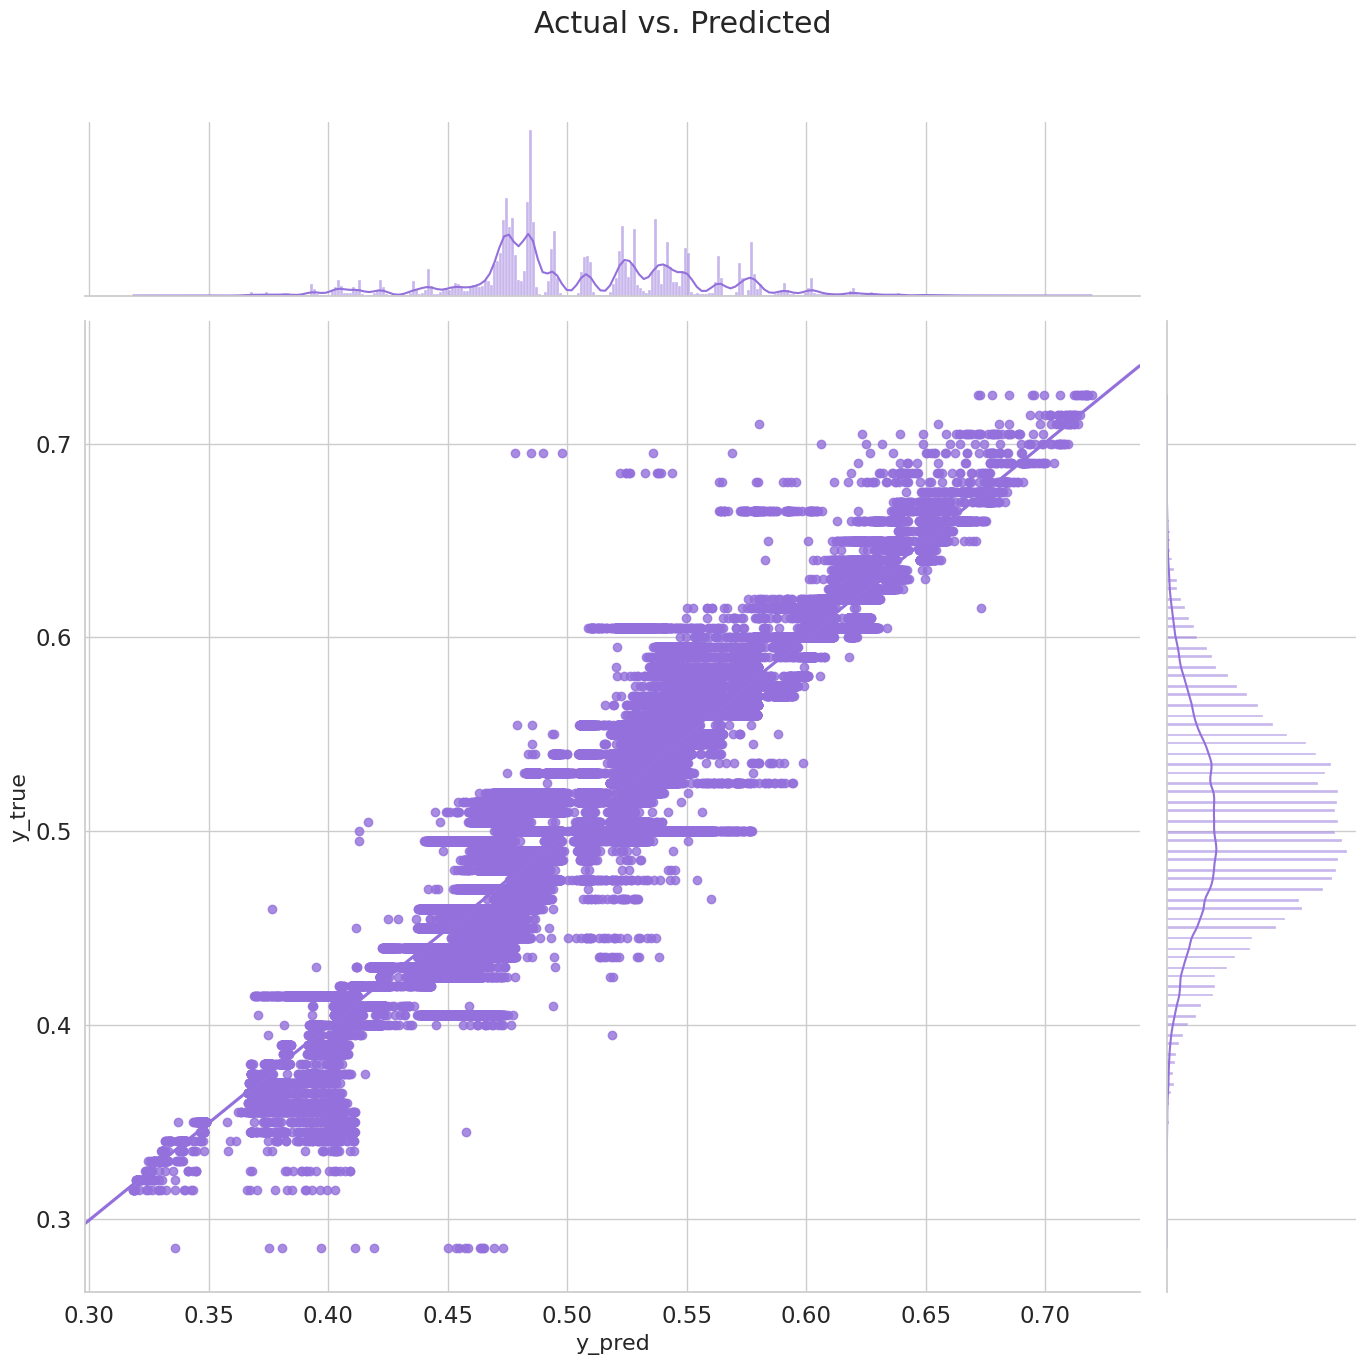

In [9]:
sns.set(style="whitegrid", font_scale=1.5)
g = sns.jointplot(
    x=y_preds,
    y=y_train,
    kind="reg",
    truncate=False,
    color='#9370DB',
    height=14,
)
g.set_axis_labels('y_pred', 'y_true', fontsize=16)
g.fig.suptitle("Actual vs. Predicted")
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.9)

# Visualizing the Results

In [10]:
score = predictor.evaluate(_val, silent=True)['r2']

In [11]:
print(f"Validation R2 Score: {score}")

Validation R2 Score: 0.869544097566056


In [12]:
fi = predictor.feature_importance(data=_val, silent=True)
lb = predictor.leaderboard(_val, silent=True)

These features in provided data are not utilized by the predictor and will be ignored: ['_sort_19', '_50th', '_cnt19', '_cnt22']


In [13]:
lb.style.background_gradient(subset=['score_val', 'score_test'], cmap='RdYlGn')

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3_FULL,0.869544,None,r2,18.251225,nan,8100.896141,0.008528,nan,6.525135,3,True,22
1,ExtraTreesMSE_BAG_L2_FULL,0.869514,None,r2,16.191516,nan,6130.026829,3.450810,86.715349,1827.559488,2,True,20
2,XGBoost_BAG_L2/T2_FULL,0.869437,None,r2,13.618105,nan,4344.502799,0.877399,nan,42.035457,2,True,21
3,ExtraTreesMSE_BAG_L1_FULL,0.869411,None,r2,3.559444,77.721833,1288.705857,3.559444,77.721833,1288.705857,1,True,2
4,RandomForestMSE_BAG_L2_FULL,0.869372,None,r2,13.914488,nan,6224.776061,1.173782,32.531072,1922.308720,2,True,19
5,XGBoost_BAG_L1/T1_FULL,0.869137,None,r2,1.040176,nan,42.892517,1.040176,nan,42.892517,1,True,3
6,RandomForestMSE_BAG_L1_FULL,0.869128,None,r2,2.284172,58.253075,2251.056724,2.284172,58.253075,2251.056724,1,True,17
7,CatBoost_BAG_L1/T1_FULL,0.869104,None,r2,0.102980,nan,322.341203,0.102980,nan,322.341203,1,True,1
8,LightGBMXT_BAG_L1/T2_FULL,0.866675,None,r2,1.481880,nan,68.926614,1.481880,nan,68.926614,1,True,5
9,LightGBMXT_BAG_L1/T3_FULL,0.866244,None,r2,1.623715,nan,78.136787,1.623715,nan,78.136787,1,True,6


In [14]:
fi.style.background_gradient(cmap='RdYlGn')

,importance,stddev,p_value,n,p99_high,p99_low
_sum,0.718308,0.005427,0.000000,5,0.729482,0.707135
_sum_log,0.051055,0.000711,0.000000,5,0.052519,0.049591
_mean,0.047913,0.000886,0.000000,5,0.049738,0.046088
_entropy,0.007498,0.000877,0.000022,5,0.009304,0.005692
_special1,0.001612,0.000197,0.000026,5,0.002019,0.001205
_2nd_moment,0.001045,0.000200,0.000152,5,0.001456,0.000634
_max,0.000812,0.000247,0.000915,5,0.001322,0.000303
_gmean,0.000786,0.000417,0.006786,5,0.001645,-0.000073
_cnt15,0.000445,0.000190,0.003198,5,0.000837,0.000053
_skew,0.000369,0.000143,0.002243,5,0.000663,0.000074


# Making Predictions and Creating a Submission File

In [15]:
test = pd.read_csv('/kaggle/input/flood-prediction-precomputed-stat-features/test.csv', index_col='id')
test = test.drop(columns=feats_to_drop)
test = TabularDataset(test)

preds = predictor.predict(test)

In [16]:
submission = pd.DataFrame({'id': test.index, 'FloodProbability ': preds})
submission.to_csv(f'autogluon-{score:.6f}.csv', index=False)
submission.head()

,id,FloodProbability
id,,
1117957,1117957,0.579138
1117958,1117958,0.455893
1117959,1117959,0.448374
1117960,1117960,0.467152
1117961,1117961,0.465876


In [17]:
shutil.rmtree("AutogluonModels")